# Building a basic chatbot
#### Mt SAC CISB 63 Midterm Project Fall 2023
#### Roberth Bellido

# Introduction

In [28]:
# I will be using Amazon's site for various product categories and/or situations.
# Now, since the database is huge, I will only use a subset of questions and answers

### Architecture of the chatbot

 1. import the single csv 
 2. do some exploratory data analysis on the data
 3. create a single df with only questions and answers
 4. Vectorize and preprocess the question data
 5. Vectorize and preprocess the user's query
 6. Assess the most similar question to the user's query using cosine similarity
 7. Return the corresponding answer to the most similar question as a chat response

#### Let's import some libraries

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Let's add one more: 

### ast — Abstract Syntax Trees 

#### The ast module helps Python applications to process trees of the Python abstract syntax grammar.

In [2]:
import ast

#### Let's create two lists for our questions and answers

In [3]:
questions = []
answers = []

In [4]:
qna = pd.read_csv('single_qna.csv')

# EDA(Exploratory Data Analysis)

In [5]:
qna.head()

,QuestionType,Asin,AnswerTime,UnixTime,Question,AnswerType,Answer,Category
0,yes/no,B00004U9JP,"Jun 27, 2014",1.403852e+09,I have a 9 year old Badger 1 that needs replac...,?,I replaced my old one with this without a hitch.,Appliances
1,open-ended,B00004U9JP,"Apr 28, 2014",1.398668e+09,model number,NaN,This may help InSinkErator Model BADGER-1: Bad...,Appliances
2,yes/no,B00004U9JP,"Aug 25, 2014",1.408950e+09,can I replace Badger 1 1/3 with a Badger 5 1/2...,?,Plumbing connections will vary with different ...,Appliances
3,yes/no,B00004U9JP,"Nov 3, 2014",1.415002e+09,Does this come with power cord and dishwasher ...,?,It does not come with a power cord. It does co...,Appliances
4,open-ended,B00004U9JP,"Jun 21, 2014",1.403334e+09,loud noise inside when turned on. sounds like ...,NaN,Check if you dropped something inside.Usually ...,Appliances


In [6]:
qna.tail()

,QuestionType,Asin,AnswerTime,UnixTime,Question,AnswerType,Answer,Category
1396891,yes/no,B00KGGJPYA,"Nov 26, 2014",1.416989e+09,Does the adaptor cord for the iPhone 5 work wi...,N,No,Video Games
1396892,yes/no,B00KGGJPYA,"Oct 19, 2014",1.413702e+09,will it charge a kidle fire?,Y,"Simply answered, yes. It comes with a 3-in-1 a...",Video Games
1396893,open-ended,B00KGGJPYA,"Oct 15, 2014",1.413356e+09,What are the dimensions of this product?,NaN,4 by 1 1/2 inches,Video Games
1396894,yes/no,B00KGGJPYA,"Jul 15, 2014",1.405408e+09,Does this have connector for 5C? I think 5C is...,?,I was able to charge Gembonics battery with iP...,Video Games
1396895,open-ended,B00KGGJPYA,"Jul 7, 2014",1.404716e+09,so I just bought the Gembonics Battery Back up...,NaN,The Gembonics charger comes with a 3-in-1 cabl...,Video Games


In [7]:
#Seeing if there is any null values
qna.isna().sum()

QuestionType         0
Asin                 0
AnswerTime           0
UnixTime         49905
Question             1
AnswerType      733030
Answer             146
Category             0
dtype: int64

In [8]:
#Dropping null entire row for null values in Question and Answer Column since it will not be useful to use
qna.dropna(subset=['Answer'], inplace=True)
qna.dropna(subset=['Question'], inplace=True)

In [9]:
#Seeing if there is any null values
qna.isna().sum()

QuestionType         0
Asin                 0
AnswerTime           0
UnixTime         49903
Question             0
AnswerType      732927
Answer               0
Category             0
dtype: int64

In [10]:
#Total number of questions and answers for each category available
qna['Category'].value_counts()

Category
Electronics                    314212
Home and Kitchen               184421
Sports and Outdoors            146882
Tools and Home Improvement     101079
Automotive                      89913
Cell Phones and Accessories     85854
Health and Personal Care        80492
Patio Lawn and Garden           59591
Toys and Games                  51482
Office Products                 43601
Beauty                          42418
Pet Supplies                    36605
Baby                            28931
Musical Instruments             23319
Clothing Shoes and Jewelry      22066
Arts Crafts and Sewing          21262
Grocery and Gourmet Food        19534
Video Games                     13305
Industrial and Scientific       12135
Software                        10636
Appliances                       9011
Name: count, dtype: int64

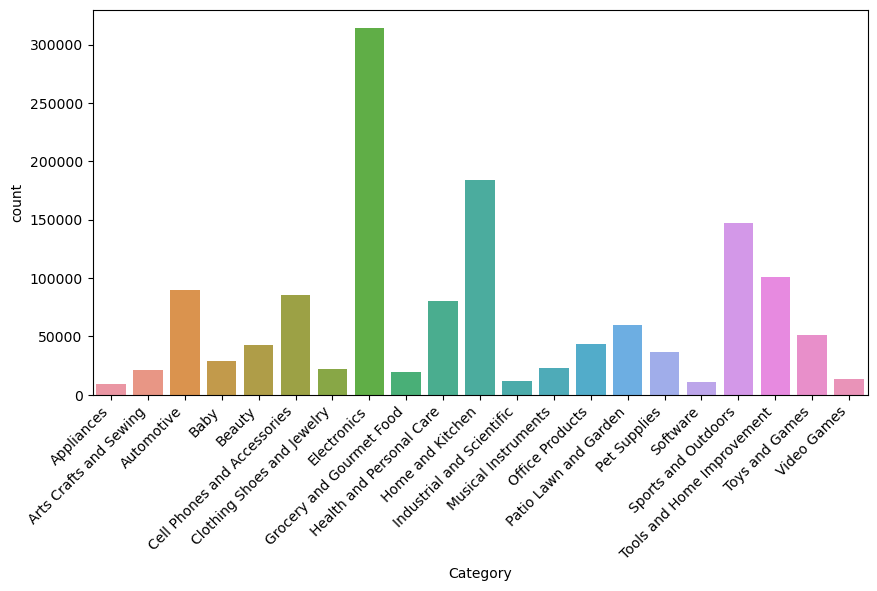

In [11]:
#Total number of questions and answers for each category available in a historical plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=qna, x='Category', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: xlabel='QuestionType', ylabel='Count'>

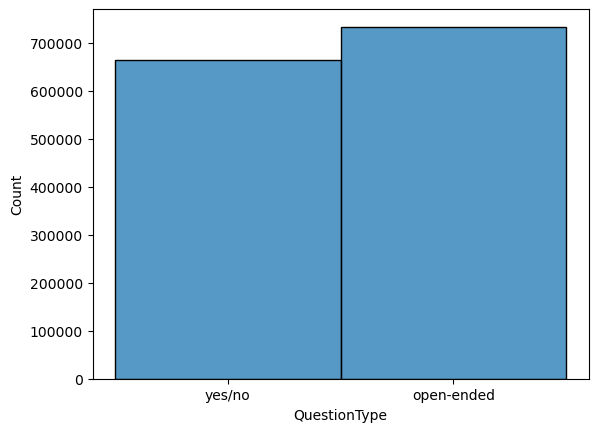

In [12]:
#Type of questions provided in the dataset
sns.histplot(data=qna, x='QuestionType')

# NLP Techniques

# Let's create a pandas dataframe with the questions and answers only

#### Let's load the questions and answers in separate lists

In [13]:
DF = pd.DataFrame(qna[['Question','Answer']])

In [14]:
DF.head(20)

,Question,Answer
0,I have a 9 year old Badger 1 that needs replac...,I replaced my old one with this without a hitch.
1,model number,This may help InSinkErator Model BADGER-1: Bad...
2,can I replace Badger 1 1/3 with a Badger 5 1/2...,Plumbing connections will vary with different ...
3,Does this come with power cord and dishwasher ...,It does not come with a power cord. It does co...
4,loud noise inside when turned on. sounds like ...,Check if you dropped something inside.Usually ...
5,where is the reset button located,on the bottom
6,I have a badger 5 it is leaking water at botto...,If your garbage disposal is leaking out the bo...
7,"If no power cord is included, how do I plug in...",I ttok mine off of the broken unit and install...
8,Can someone tell me if this Badger 5 disposer ...,"I replaced my a couple of months ago, I'm semi..."
9,Is this Badger 5 compatible with the Badger 5 ...,It fit the same as the one we replaced


In [15]:
answers = pd.Series(qna["Answer"])

In [16]:
DF.tail()

,Question,Answer
1396891,Does the adaptor cord for the iPhone 5 work wi...,No
1396892,will it charge a kidle fire?,"Simply answered, yes. It comes with a 3-in-1 a..."
1396893,What are the dimensions of this product?,4 by 1 1/2 inches
1396894,Does this have connector for 5C? I think 5C is...,I was able to charge Gembonics battery with iP...
1396895,so I just bought the Gembonics Battery Back up...,The Gembonics charger comes with a 3-in-1 cabl...


In [17]:
questions = qna["Question"]

#### Let's tokenize the text and convert data in matrix format

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(questions)

#### This is new!!!! <br> Let's Transform data by applying term frequency inverse document frequency (TF-IDF) 

In [19]:
tfidf = TfidfTransformer() 
X_tfidf = tfidf.fit_transform(X_vec)

In [20]:
tfidf

TfidfTransformer()

In [21]:
X_tfidf

<1396749x179518 sparse matrix of type '<class 'numpy.float64'>'
	with 8433629 stored elements in Compressed Sparse Row format>

#### X_tfidf is the repository matrix that will be searched every time a new question is entered in the chatbot for the most similar question. 

#### Let's do a functions "conversation"

#### We need to calculate the angle between every row of the X_tfidf matrix and the new question vector. Note that we are using skelearn cosine_similarity module to calculate the cosine between each row and the vector and then convert the cosine into degrees. 

#### Finally, we search the row that has the maximum cosine (or the minimum angle) with the new question vector and return the corresponding answer. 

In [22]:
def conversation(im):
    global tfidf, answers, X_tfidf
    Y_vec = vectorizer.transform(im)
    Y_tfidf = tfidf.fit_transform(Y_vec)
    cos_sim = np.rad2deg(np.arccos(max(cosine_similarity(Y_tfidf, X_tfidf)[0])))
    if cos_sim > 60:
        return "sorry, I did not quite understand that"
    else: 
        return answers[np.argmax(cosine_similarity(Y_tfidf, X_tfidf)[0])]

#### Finally, let's implement the chat where the user enters a question and the bot provides a response. The chat continues until the user types "bye"

In [23]:
def main():
    usr = input('Enter your name: ')
    print("Support: Hi, welcome to Q&A support. How can I help you?")
    while True:
        im = input("{}: ".format(usr))
        if im.lower() == 'bye':
            print("Q&A support: bye!")
            break
        else:
            print("Q&A support: " +conversation([im]))

### Let's test

In [24]:
main()

Enter your name: roberto carlos el futbolista mas chido del mundo
Support: Hi, welcome to Q&A support. How can I help you?
roberto carlos el futbolista mas chido del mundo: could you provide me package tracking information
Q&A support: Very difficult my wife uses a small screwdriver and a xacto knife
roberto carlos el futbolista mas chido del mundo: WHY DOES YOUR WIFE USE A SMALL SCREWDRIVER
Q&A support: Sorry I can't really give you much of a time estimate but I can say I have not been disappointed. I don't use mine all the time. I go in spurts. I'll use it daily for a few weeks then not at all for months but so far I have not finshed one cartridge yet. Some advice though, try to turn it off while you brush and style your hair then back on as needed. It doesn't take long at all to heat up and saves the cell.
roberto carlos el futbolista mas chido del mundo: I WOULD HOPE A GOOD SCREW WOULD NOT BE DISAPPOINTED
Q&A support: Dear Alma, Thank you for your inquiry. The sink is 17 3/4" wide 

# Conclusion

In [26]:
# The dataset is limited, as I engaged with the system to ask questions
# that a regular customer and/or consumer would ask, the dataset does not provide
# relevant information. This would mean, the recorded information is not extensive
# as I would expected to be.  Having worked for/with Shopify and Amazon, I am
# very much familiar with most possible scenarios.

## This project is Awesome!